# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp16 # use or create a database named demo
tweet_collection = db.tlab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [18]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#,locations = locations)   #Use either track or locations

1327098435087052801
1327098435527315456
1327098436076806145
1327098437053992960
1327098438023061506
1327098438924681216
1327098439042260993
1327098439092510720
1327098439599984642
1327098440283607042
1327098440728383489
1327098440963252225
1327098440950624257
1327098441151856641
1327098443974766593
1327098444524228608
1327098445035958272
1327098445195337729
1327098445606367234
1327098446679924737
1327098447153999875
1327098448512954369
1327098449410592771
1327098449238618112
1327098449519464448
1327098449922285568
1327098451062968320
1327098451595759621
1327098453919367169
1327098454439587840
1327098455446020098
1327098455311998976
1327098456150708225
1327098456834510850
1327098457358819328
1327098458587635714
1327098459506282496
1327098460475183104
1327098460613595136
1327098460714143746
1327098461355872261
1327098461251010560
1327098461540343808
1327098462769393664
1327098463759241216
1327098464279334919
1327098464640135174
1327098465755615233
1327098466955264000
1327098467441893382


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Nov 13 03:57:39 +0000 2020'
'Fri Nov 13 03:57:39 +0000 2020'
'Fri Nov 13 03:57:39 +0000 2020'
'Fri Nov 13 03:57:38 +0000 2020'
'Fri Nov 13 03:57:38 +0000 2020'
'Fri Nov 13 03:57:38 +0000 2020'
'Fri Nov 13 03:57:38 +0000 2020'
'Fri Nov 13 03:57:38 +0000 2020'
'Fri Nov 13 03:57:37 +0000 2020'
'Fri Nov 13 03:57:37 +0000 2020'
'Fri Nov 13 03:57:36 +0000 2020'
'Fri Nov 13 03:57:36 +0000 2020'
'Fri Nov 13 03:57:35 +0000 2020'
'Fri Nov 13 03:57:35 +0000 2020'
'Fri Nov 13 03:57:35 +0000 2020'
'Fri Nov 13 03:57:34 +0000 2020'
'Fri Nov 13 03:57:34 +0000 2020'
'Fri Nov 13 03:57:34 +0000 2020'
'Fri Nov 13 03:57:33 +0000 2020'
'Fri Nov 13 03:57:32 +0000 2020'
'Fri Nov 13 03:57:32 +0000 2020'
'Fri Nov 13 03:57:31 +0000 2020'
'Fri Nov 13 03:57:31 +0000 2020'
'Fri Nov 13 03:57:31 +0000 2020'
'Fri Nov 13 03:57:30 +0000 2020'
'Fri Nov 13 03:57:30 +0000 2020'
'Fri Nov 13 03:57:30 +0000 2020'
'Fri Nov 13 03:57:30 +0000 2020'
'Fri Nov 13 03:57:29 +0000 2020'
'Fri Nov 13 03:57:28 +0000 2020'
'Fri Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Nov 13 03:54:15 +0000 2020'
'Fri Nov 13 03:54:15 +0000 2020'
'Fri Nov 13 03:54:15 +0000 2020'
'Fri Nov 13 03:54:15 +0000 2020'
'Fri Nov 13 03:54:15 +0000 2020'
'Fri Nov 13 03:54:14 +0000 2020'
'Fri Nov 13 03:54:14 +0000 2020'
'Fri Nov 13 03:54:13 +0000 2020'
'Fri Nov 13 03:54:13 +0000 2020'
'Fri Nov 13 03:54:13 +0000 2020'
'Fri Nov 13 03:54:12 +0000 2020'
'Fri Nov 13 03:54:12 +0000 2020'
'Fri Nov 13 03:54:12 +0000 2020'
'Fri Nov 13 03:54:11 +0000 2020'
'Fri Nov 13 03:54:11 +0000 2020'
'Fri Nov 13 03:54:11 +0000 2020'
'Fri Nov 13 03:54:10 +0000 2020'
'Fri Nov 13 03:54:10 +0000 2020'
'Fri Nov 13 03:54:10 +0000 2020'
'Fri Nov 13 03:54:10 +0000 2020'
'Fri Nov 13 03:54:09 +0000 2020'
'Fri Nov 13 03:54:09 +0000 2020'
'Fri Nov 13 03:54:08 +0000 2020'
'Fri Nov 13 03:54:08 +0000 2020'
'Fri Nov 13 03:54:08 +0000 2020'
'Fri Nov 13 03:54:08 +0000 2020'
'Fri Nov 13 03:54:08 +0000 2020'
'Fri Nov 13 03:54:07 +0000 2020'
'Fri Nov 13 03:54:07 +0000 2020'
'Fri Nov 13 03:54:06 +0000 2020'
'Fri Nov 1

'Fri Nov 13 03:52:40 +0000 2020'
'Fri Nov 13 03:52:40 +0000 2020'
'Fri Nov 13 03:52:39 +0000 2020'
'Fri Nov 13 03:52:39 +0000 2020'
'Fri Nov 13 03:52:38 +0000 2020'
'Fri Nov 13 03:52:38 +0000 2020'
'Fri Nov 13 03:52:37 +0000 2020'
'Fri Nov 13 03:52:37 +0000 2020'
'Fri Nov 13 03:52:36 +0000 2020'
'Fri Nov 13 03:52:36 +0000 2020'
'Fri Nov 13 03:52:36 +0000 2020'
'Fri Nov 13 03:52:35 +0000 2020'
'Fri Nov 13 03:52:35 +0000 2020'
'Fri Nov 13 03:52:35 +0000 2020'
'Fri Nov 13 03:52:35 +0000 2020'
'Fri Nov 13 03:52:34 +0000 2020'
'Fri Nov 13 03:52:33 +0000 2020'
'Fri Nov 13 03:52:33 +0000 2020'
'Fri Nov 13 03:52:33 +0000 2020'
'Fri Nov 13 03:52:32 +0000 2020'
'Fri Nov 13 03:52:32 +0000 2020'
'Fri Nov 13 03:52:32 +0000 2020'
'Fri Nov 13 03:52:31 +0000 2020'
'Fri Nov 13 03:52:31 +0000 2020'
'Fri Nov 13 03:52:30 +0000 2020'
'Fri Nov 13 03:52:30 +0000 2020'
'Fri Nov 13 03:52:30 +0000 2020'
'Fri Nov 13 03:52:30 +0000 2020'
'Fri Nov 13 03:52:29 +0000 2020'
'Fri Nov 13 03:52:28 +0000 2020'
'Fri Nov 1

'Fri Nov 13 03:51:15 +0000 2020'
'Fri Nov 13 03:51:15 +0000 2020'
'Fri Nov 13 03:51:15 +0000 2020'
'Fri Nov 13 03:51:14 +0000 2020'
'Fri Nov 13 03:51:14 +0000 2020'
'Fri Nov 13 03:51:13 +0000 2020'
'Fri Nov 13 03:51:13 +0000 2020'
'Fri Nov 13 03:51:12 +0000 2020'
'Fri Nov 13 03:51:11 +0000 2020'
'Fri Nov 13 03:51:11 +0000 2020'
'Fri Nov 13 03:51:11 +0000 2020'
'Fri Nov 13 03:51:10 +0000 2020'
'Fri Nov 13 03:51:10 +0000 2020'
'Fri Nov 13 03:51:09 +0000 2020'
'Fri Nov 13 03:51:09 +0000 2020'
'Fri Nov 13 03:51:09 +0000 2020'
'Fri Nov 13 03:51:09 +0000 2020'
'Fri Nov 13 03:51:08 +0000 2020'
'Fri Nov 13 03:51:08 +0000 2020'
'Fri Nov 13 03:51:08 +0000 2020'
'Fri Nov 13 03:51:07 +0000 2020'
'Fri Nov 13 03:51:07 +0000 2020'
'Fri Nov 13 03:51:07 +0000 2020'
'Fri Nov 13 03:51:07 +0000 2020'
'Fri Nov 13 03:51:06 +0000 2020'
'Fri Nov 13 03:51:06 +0000 2020'
'Fri Nov 13 03:51:06 +0000 2020'
'Fri Nov 13 03:51:05 +0000 2020'
'Fri Nov 13 03:51:05 +0000 2020'
'Fri Nov 13 03:51:05 +0000 2020'
'Fri Nov 1

'Fri Nov 13 03:49:55 +0000 2020'
'Fri Nov 13 03:49:54 +0000 2020'
'Fri Nov 13 03:49:54 +0000 2020'
'Fri Nov 13 03:49:53 +0000 2020'
'Fri Nov 13 03:49:53 +0000 2020'
'Fri Nov 13 03:49:53 +0000 2020'
'Fri Nov 13 03:49:53 +0000 2020'
'Fri Nov 13 03:49:53 +0000 2020'
'Fri Nov 13 03:49:53 +0000 2020'
'Fri Nov 13 03:49:52 +0000 2020'
'Fri Nov 13 03:49:52 +0000 2020'
'Fri Nov 13 03:49:52 +0000 2020'
'Fri Nov 13 03:49:52 +0000 2020'
'Fri Nov 13 03:49:52 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:51 +0000 2020'
'Fri Nov 13 03:49:50 +0000 2020'
'Fri Nov 13 03:49:50 +0000 2020'
'Fri Nov 13 03:49:50 +0000 2020'
'Fri Nov 13 03:49:50 +0000 2020'
'Fri Nov 13 03:49:49 +0000 2020'
'Fri Nov 13 03:49:49 +0000 2020'
'Fri Nov 13 03:49:49 +0000 2020'
'Fri Nov 13 03:49:48 +0000 2020'
'Fri Nov 13 03:49:48 +0000 2020'
'Fri Nov 1

'Fri Nov 13 03:48:40 +0000 2020'
'Fri Nov 13 03:48:39 +0000 2020'
'Fri Nov 13 03:48:39 +0000 2020'
'Fri Nov 13 03:48:39 +0000 2020'
'Fri Nov 13 03:48:38 +0000 2020'
'Fri Nov 13 03:48:38 +0000 2020'
'Fri Nov 13 03:48:38 +0000 2020'
'Fri Nov 13 03:48:38 +0000 2020'
'Fri Nov 13 03:48:37 +0000 2020'
'Fri Nov 13 03:48:36 +0000 2020'
'Fri Nov 13 03:48:35 +0000 2020'
'Fri Nov 13 03:48:34 +0000 2020'
'Fri Nov 13 03:48:34 +0000 2020'
'Fri Nov 13 03:48:33 +0000 2020'
'Fri Nov 13 03:48:33 +0000 2020'
'Fri Nov 13 03:48:33 +0000 2020'
'Fri Nov 13 03:48:32 +0000 2020'
'Fri Nov 13 03:48:31 +0000 2020'
'Fri Nov 13 03:48:31 +0000 2020'
'Fri Nov 13 03:48:31 +0000 2020'
'Fri Nov 13 03:48:31 +0000 2020'
'Fri Nov 13 03:48:31 +0000 2020'
'Fri Nov 13 03:48:30 +0000 2020'
'Fri Nov 13 03:48:30 +0000 2020'
'Fri Nov 13 03:48:30 +0000 2020'
'Fri Nov 13 03:48:29 +0000 2020'
'Fri Nov 13 03:48:29 +0000 2020'
'Fri Nov 13 03:48:28 +0000 2020'
'Fri Nov 13 03:48:28 +0000 2020'
'Fri Nov 13 03:48:27 +0000 2020'
'Fri Nov 1

'Fri Nov 13 03:47:12 +0000 2020'
'Fri Nov 13 03:47:12 +0000 2020'
'Fri Nov 13 03:47:11 +0000 2020'
'Fri Nov 13 03:47:11 +0000 2020'
'Fri Nov 13 03:47:11 +0000 2020'
'Fri Nov 13 03:47:11 +0000 2020'
'Fri Nov 13 03:47:11 +0000 2020'
'Fri Nov 13 03:47:11 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:10 +0000 2020'
'Fri Nov 13 03:47:09 +0000 2020'
'Fri Nov 13 03:47:09 +0000 2020'
'Fri Nov 13 03:47:09 +0000 2020'
'Fri Nov 13 03:47:09 +0000 2020'
'Fri Nov 13 03:47:09 +0000 2020'
'Fri Nov 13 03:47:08 +0000 2020'
'Fri Nov 13 03:47:08 +0000 2020'
'Fri Nov 13 03:47:07 +0000 2020'
'Fri Nov 13 03:47:06 +0000 2020'
'Fri Nov 13 03:47:06 +0000 2020'
'Fri Nov 13 03:47:06 +0000 2020'
'Fri Nov 13 03:47:04 +0000 2020'
'Fri Nov 13 03:47:04 +0000 2020'
'Fri Nov 13 03:47:04 +0000 2020'
'Fri Nov 13 03:47:04 +0000 2020'
'Fri Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [19]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2249
2060


Create a text index and print the Tweets containing specific keywords. 

In [20]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [22]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document   
        
         
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: .
text: @GovAbbott I thought #Covid19 would magically disappear after the election? You have blood on your hands, @GovAbbott 🤬
----
name: Lauren
text: The election is over and COVID19 coming in hot in the media.  So you mean it wasn’t just a democratic conspiracy !? WOW
----
name: Ellen Fedell
text: @heleneduhamelTV You got elected, and now what are YOU going to do about #COVID19 ? Are you supporting our incompet… https://t.co/qZNRIehajf
----
name: Leo Firecracker
text: Right! The election was never about the American public or the US, it was all about @realDonaldTrump and his ego!… https://t.co/VkXVBjPkz1
----
name: anita kolleeny
text: RT @SamanthaLaDuc: Lockdowns all but forgotten. Election hotly contested. Vaccines pumping through markets not veins. 

The first day in a…
----
name: Leslie
text: Meanwhile, where's the #COVID19 relief @realDonaldTrump promised after he "won" the election? I mean, if he's going… https://t.co/GcR3bARmTl
----
name: Saphaia
text: @realDonaldTr

In [23]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [24]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,quote_count,reply_count,filter_level,timestamp_ms,retweeted_status,possibly_sensitive
0,5fae044bcac069be06d4da4d,Fri Nov 13 03:52:24 +0000 2020,1327096951515598849,1327096951515598849,@GovAbbott I thought #Covid19 would magically ...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326670e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fae0457cac069be06d4de68,Fri Nov 13 03:47:03 +0000 2020,1327095606616207366,1327095606616207366,The election is over and COVID19 coming in hot...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fae043acac069be06d4d809,Fri Nov 13 03:55:40 +0000 2020,1327097776350633985,1327097776350633985,"@heleneduhamelTV You got elected, and now what...",True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.323475e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fae0426cac069be06d4d69b,Fri Nov 13 03:57:20 +0000 2020,1327098196204646400,1327098196204646400,Right! The election was never about the Americ...,True,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,1327089126760468480,{'created_at': 'Fri Nov 13 03:21:18 +0000 2020...,"{'url': 'https://t.co/ImyiTQzfCe', 'expanded':...",{'full_text': 'Right! The election was never a...,0.0,0.0,low,1605239840924,NaN,NaN
4,5fae0468cac069be06d4dec4,Fri Nov 13 03:58:26 +0000 2020,1327098473150296064,1327098473150296064,RT @SamanthaLaDuc: Lockdowns all but forgotten...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1326640292330692608,{'created_at': 'Wed Nov 11 21:37:48 +0000 2020...,"{'url': 'https://t.co/A2Nuk6IXob', 'expanded':...",NaN,0.0,0.0,low,1605239906953,{'created_at': 'Wed Nov 11 21:48:00 +0000 2020...,NaN
5,5fae044dcac069be06d4db10,Fri Nov 13 03:51:19 +0000 2020,1327096680722829313,1327096680722829313,"Meanwhile, where's the #COVID19 relief @realDo...",True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fae044dcac069be06d4daf9,Fri Nov 13 03:51:27 +0000 2020,1327096715028148226,1327096715028148226,"@realDonaldTrump @seanhannity @LouDobbs Today,...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327095e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fae047dcac069be06d4df30,Fri Nov 13 03:58:48 +0000 2020,1327098561717170176,1327098561717170176,RT @JamesYoungKY: This is Jeanie and Lisa. Bot...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,low,1605239928069,{'created_at': 'Thu Nov 12 04:50:29 +0000 2020...,NaN
8,5fae047bcac069be06d4df27,Fri Nov 13 03:58:46 +0000 2020,1327098556356804608,1327098556356804608,RT @JamesYoungKY: This is Jeanie and Lisa. Bot...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,low,1605239926791,{'created_at': 'Thu Nov 12 04:50:29 +0000 2020...,NaN
9,5fae046ecac069be06d4dee6,Fri Nov 13 03:58:33 +0000 2020,1327098501478588416,1327098501478588416,RT @BeachcomberNC: @Yamiche I want to see ever...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http

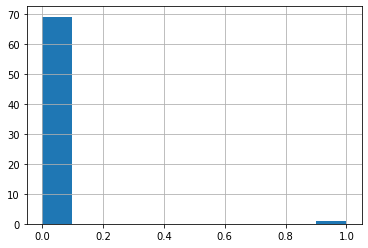

In [25]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count